In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
with open('/home/jeronimo/git/AUT-CNN-TUB/Data/Models/aws_28/model_merge_28_b5_s10000_2018-09-05_18-09/model.log') as f:
    f = f.readlines()

In [10]:
steps_entro = []
steps_ac = []
step = []
epoch = []
epoch_entro_test = []
epoch_ac_test = []
epoch_ac_train = []

for line in f:
    if 'step' in line:
        if 'cross' in line:
            step.append(int(line.split('step')[1].split(',')[0]))
            steps_entro.append(float(line.split(' ')[-1][:-1]))
        elif 'training' in line:
            steps_ac.append(float(line.split(' ')[-1][:-1]))
    elif 'epoch' in line:
        if 'test accuracy' in line:    
            epoch.append(int(line.split('epoch')[1].split(',')[0]))
            epoch_ac_test.append(float(line.split('test accuracy ')[1][:-1]))
        elif 'training accuracy' in line:
            epoch_ac_train.append(float(line.split('training accuracy ')[1][:-1]))
        elif 'cross' in line:
            epoch_entro_test.append(float(line.split('cross entropy ')[-1][:-1]))

In [11]:
len(epoch)

4

In [12]:
len(epoch_ac_train)

4

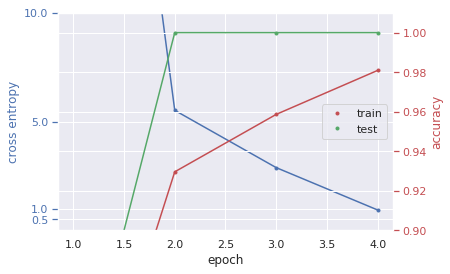

In [16]:

fig, ax1 = plt.subplots()
ax1.plot(epoch, epoch_entro_test, 'b.')
ax1.plot(epoch, epoch_entro_test, 'b')
ax1.set_ylim([0,10])
#ax1.set_yscale('symlog')
ax1.set_xlabel('epoch')
# Make the y-axis label, ticks and tick labels match the line color.

ax1.set_ylabel('cross entropy', color='b')
ax1.tick_params('y', colors='b')
ax1.set_yticks([10,5,1,0.5])


ax2 = ax1.twinx()
ax2.set_ylim([0.9,1])
#ax2.set_yscale('log')
ax2.plot(epoch, epoch_ac_test, 'r.', label='train')
ax2.plot(epoch, epoch_ac_test, 'r')
ax2.set_ylabel('accuracy', color='r')
ax2.tick_params('y', colors='r')

ax3 = ax2
ax3.set_ylim([0.9,1.01])
#ax2.set_yscale('log')
ax3.plot(epoch, epoch_ac_train, 'g.', label='test')
ax3.plot(epoch, epoch_ac_train, 'g')
#ax3.set_ylabel('accuracy', color='r')
#ax3.tick_params('y', colors='g')
ax3.legend(loc=7)
plt.show()

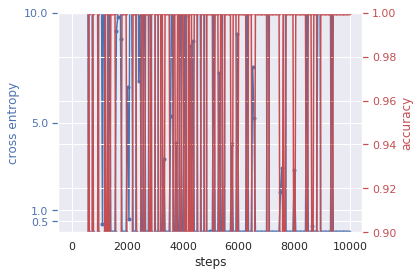

In [17]:

fig, ax1 = plt.subplots()
ax1.plot(step, steps_entro, 'b.')
ax1.plot(step, steps_entro, 'b')
ax1.set_ylim([0,10])
#ax1.set_yscale('symlog')
ax1.set_xlabel('steps')
# Make the y-axis label, ticks and tick labels match the line color.

ax1.set_ylabel('cross entropy', color='b')
ax1.tick_params('y', colors='b')
ax1.set_yticks([10,5,1,0.5])


ax2 = ax1.twinx()
ax2.set_ylim([0.9,1])
#ax2.set_yscale('log')
ax2.plot(step, steps_ac, 'r.')
ax2.plot(step, steps_ac, 'r')
ax2.set_ylabel('accuracy', color='r')
ax2.tick_params('y', colors='r')
fig.tight_layout()
plt.show()

In [18]:
len(steps_entro)

200

In [19]:
# start
f[0].split(' - root - ')[0]

'2018-09-05 18:09:53,837'

In [20]:
# end
for r in f:
    if '- root - INFO - test accuracy' in r:
        print(r.split(' - root - ')[0])

2018-09-05 18:12:53,328


In [21]:
# traingsduration in min
float(f[-1].split('Model training tock, ')[1].split(' secondes\n')[0])/60

2.994704588254293

In [22]:
f[0].split('MINIBATCH_SIZE: ')[1].split(',')[0]

'5'

In [23]:
f[0].split('STEPS: ')[1].split(',')[0]

'10000'

In [24]:
f[0].split('PIXEL: ')[1].split(',')[0]

'28'

In [25]:
f[0].split('COLOR: ')[1].split(',')[0]

'3'

In [26]:
f[0].split('CFAK: ')[1].split(',')[0]

'6'

In [27]:
f[0].split('DROP: ')[1].split('\n')[0]

'0.8'